
# **Decision Tree Classification: CART**

 **1. Exploratory Data Analysis**

 **2. Data Preprocessing & Feature Engineering** 

 **3. Modeling using CART**

 **4. Hyperparameter Optimization with GridSearchCV**

 **5. Final Model**

 **6. Feature Importance**

 **7. Analyzing Model Complexity with Learning Curves (BONUS)**

 **8. Visualizing the Decision Tree**

 **9. Extracting Decision Rules**

 **10. Extracting Python/SQL/Excel Codes of Decision Rules**

 **11. Prediction using Python Codes**
 
 **12. Saving and Loading Model**

In [1]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install skompiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install astor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
import graphviz

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

In [6]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_11 (08.12.22-14.12.22) ml/dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **Modeling using CART**

In [10]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

* **random_state=1, ortak çıktı elde etmek için yazıldı özel bir amacı yok.**

In [11]:
# Confusion matrix için y_pred:
y_pred = cart_model.predict(X)

In [12]:
# AUC için y_prob:
y_prob = cart_model.predict_proba(X)[:, 1]

In [13]:
# Confusion matrix
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



**MODEL BAŞARISI 1 ÇIKTI !**


* Doğru bir yolda mıyım yoksa yanlış bir yolda mıyım. Başarımı nasıl doğru değerlendiririm ?

* Bu durumda başarının doğrulanmaya ihtiyacı vardır. Holdout yöntemi uygulanabilir.

### **Holdout Yöntemi ile Başarı Değerlendirme**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [15]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [16]:
# AUC
roc_auc_score(y, y_prob)

1.0

In [17]:
# Train Hatası
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       191

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



* **Train hatası 1 çıktı. Test hatasına bakılır.**

In [18]:
roc_auc_score(y_train, y_prob)

1.0

In [19]:
# Test Hatası
y_pred = cart_model.predict(X_test)  # modelin hiç görmediği test setini gönderiyoruz
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.53      0.56      0.54        77

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.69      0.69       231



0.6558441558441559

* **Model train seti üzerinden kurulmuştur. Eğitildiği sette yüksek veriler verdi. Fakat  hiç  görmediği test setinde çalışınca başarısı aşırı düştü ! Açıkça görülüyor ki model overfit olmuştur.** 

* **acc değeri : 0.69 iyi de değil kötüde değil**

* **roc_auc_score : 65 oldukça kötü**

### **CV ile Başarı Değerlendirme**

In [20]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

cv_results = cross_validate(cart_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

* **cart_model sonunda fit yazdık o yüzden ezberledi gibi bir soru olabilir fakat cv yöntemi kendi tekrar parçalayıp böldüğü için sorun olmayacaktır.**

In [21]:
cv_results['test_accuracy'].mean()

0.7058568882098294

In [22]:
cv_results['test_f1'].mean()

0.5710621194523633

In [23]:
cv_results['test_roc_auc'].mean()

0.6719440950384347

* **Cross Validation uyguladık fakat sonuçlar yine pek istenilen gibi gelmedi. Model başarısı nasıl arttırılır ?** 

**$→$ Yeni gözlemler ekleyerek**

**$→$ Yeni değişkenler ekleyerek** 

**$→$ Veri ön işleme işlemlerine dokunarak** 

**$→$ Hiperparametre optimizasyonu yaparak**

**$→$ Oranları, dağılımları birbirinden farklı olan dengesiz verileri dengeleyerek**

**Yukarıdaki yöntemler ile model başarısı arttırılmaya çalışılır.** 

### **Hyperparameter Optimization with GridSearchCV**

In [24]:
cart_model.get_params() # cart'ın mevcut parametreleri

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

* **overfit önüne geçmek için max_depth ve min_samples_split önemli parametrelerdir!**

In [25]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

* **Aralıkları neye göre, nasıl belirleriz?**

* **Ön tanımlı değerlere gitmek bir seçenek olabilir. O değer etrafındaki aralıklar belirlenebilir.**


In [26]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              scoring="f1",
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [27]:
cart_best_grid.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [28]:
cart_best_grid.best_score_

0.6395752751155839

* **0.6395752751155839 bu değer GridSeacrh içindeki skordur, ön tanımlı olarak accuracy verir. scoring ="f1" de diyip değiştirilebilir.**

* **scoring :"roc_auc" göre yaparsan farklı sonuç alırsın.**

In [29]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=2).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


* **verbose raporlamanın türünü ifade ediyor. ister verbose=True de ister verbose=1. verbose=2 dersen eşleştirme dökumanı çıkar.**

* **cart_best_grid  GridSearch içinde en iyi modeli saklar.**

In [30]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [31]:
cart_best_grid.best_score_

0.7500806383159324

In [32]:
random = X.sample(1, random_state=45)
random

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,5,158,84,41,210,39.4,0.395,29


In [33]:
cart_best_grid.predict(random)

array([1])

### **Final Model**

In [34]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X, y)
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [35]:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)
cart_final

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=17)

* **(cart_best_grid.best_params_) parametreleri var olan modele göre set edilebilir.** 

In [36]:
cv_results = cross_validate(cart_final,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])
cv_results #sonuç karışık geldiği için içinden ortalama alıp seçmen gerekiyor

{'fit_time': array([0.00709033, 0.00631499, 0.00635815, 0.00659633, 0.0106442 ]),
 'score_time': array([0.00923276, 0.00871301, 0.0187006 , 0.0252893 , 0.00952101]),
 'test_accuracy': array([0.74675325, 0.68831169, 0.75324675, 0.79084967, 0.77124183]),
 'test_f1': array([0.59793814, 0.55555556, 0.59574468, 0.69230769, 0.63157895]),
 'test_roc_auc': array([0.81537037, 0.72333333, 0.80518519, 0.83962264, 0.8054717 ])}

In [37]:
cv_results['test_accuracy'].mean()

0.7500806383159324

In [38]:
cv_results['test_f1'].mean()

0.614625004082526

In [39]:
cv_results['test_roc_auc'].mean()

0.797796645702306

### **Feature Importance**


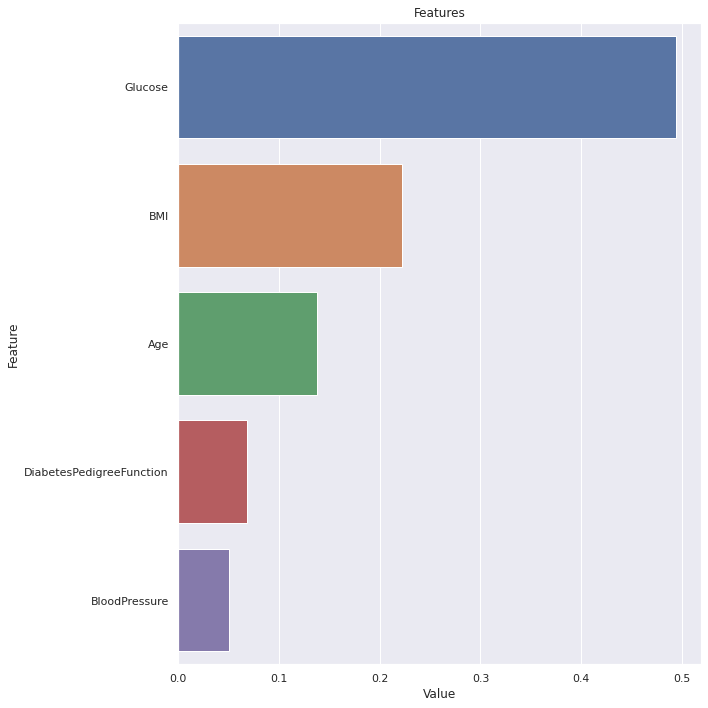

In [40]:
cart_final.feature_importances_

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(cart_final, X, num=5)

### **Analyzing Model Complexity with Learning Curves (BONUS)**

* **Train hatası ile test hatası birlikte gözlemlenir. Ayrım noktaları üzerinden karar verilmeye çalışılır.** 

In [41]:
train_score, test_score = validation_curve(cart_final, X, y,
                                           param_name="max_depth",
                                           param_range=range(1, 11),
                                           scoring="roc_auc",
                                           cv=10)

In [42]:
mean_train_score = np.mean(train_score, axis=1)
print("mean_train_score: ", mean_train_score)
mean_test_score = np.mean(test_score, axis=1)
print("mean_test_score: ", mean_test_score)

mean_train_score:  [0.70729413 0.78976751 0.83642714 0.87603684 0.90819184 0.93528351
 0.96013549 0.97716774 0.98781586 0.99359846]
mean_test_score:  [0.68127066 0.74061681 0.77597863 0.77651852 0.77109259 0.76239744
 0.74034473 0.7137265  0.69966524 0.69232051]


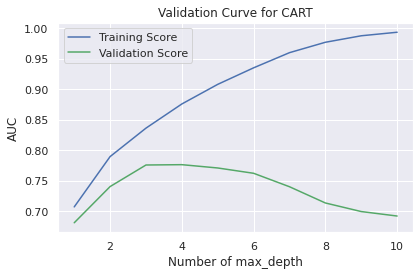

In [43]:
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')

plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

* **max_depth ve AUC skoruna göre verilen grafik yorumlanırsa: max_depth 3 olana kadar train_score da validation_score da artış göstermiş.** 

* **max_depth 4 olduğunda, train hala artış gösteriyor fakat validation_score düşmeye başlıyor. Validation skorunun düşmesinin nedeni modelin veriyi ezberlemeye başlamasından kaynaklanmaktadır.** 

* **Model karmaşıklığı, dal sayısı arttıkça genellenebilirlik yeteneğini kaybetmeye başlar.**

* **Bu grafikteki tek değişken max_depth bakıp karar verildiğinde max_depth 3 olduğunda durdurmak gerekir.**

* **Diğer parametrelere de eşanlı bir şekilde bakıldığında, örneğin yukarıda hiperparametre optimizasyonunda yapıldığında best_paramslarda max_depth 5 çıkmıştı. Yorum olarak grafikten bakıldığında, çok da kötü bir seçim olmadığı teyit edilir.**

❤ **Yani, tek başına bu grafik bir fikir verebilir fakat birden fazla parametre (hiperparametre optimizasyonu) ile modeli değerlendirmek daha doğru sonuçlara ulaşmayı sağlayacaktır.** 

In [44]:
# ⚡ Hayat kurtaranlar serisinden...

def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}") # modeli dinamik bir şekilde tutmayı sağlar.
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

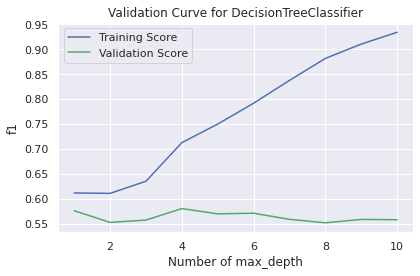

In [45]:
val_curve_params(cart_final, X, y, "max_depth", range(1, 11), scoring="f1")

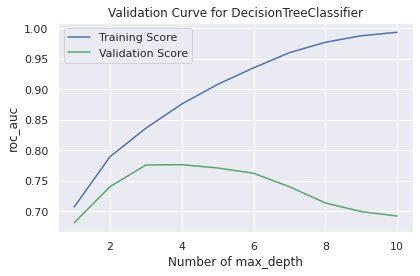

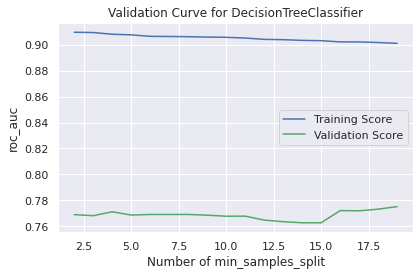

In [46]:
cart_val_params = [["max_depth", range(1, 11)], ["min_samples_split", range(2, 20)]]

for i in range(len(cart_val_params)):
    val_curve_params(cart_model, X, y, cart_val_params[i][0], cart_val_params[i][1])

### **Visualizing the Decision Tree**

In [47]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [49]:
tree_graph(model=cart_final, col_names=X.columns, file_name="/content/gdrive/MyDrive/DSMLBC10/week_12 (15.12.22-21.12.22) ml/cart_final.png")

cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

* **Aşağıdaki görsel Github hesabında ayrıca mevcuttur. DecisionTreeClassifier hakkında detaylı bilgiye aşağıdaki linkten ulaşabilirsiniz.**

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

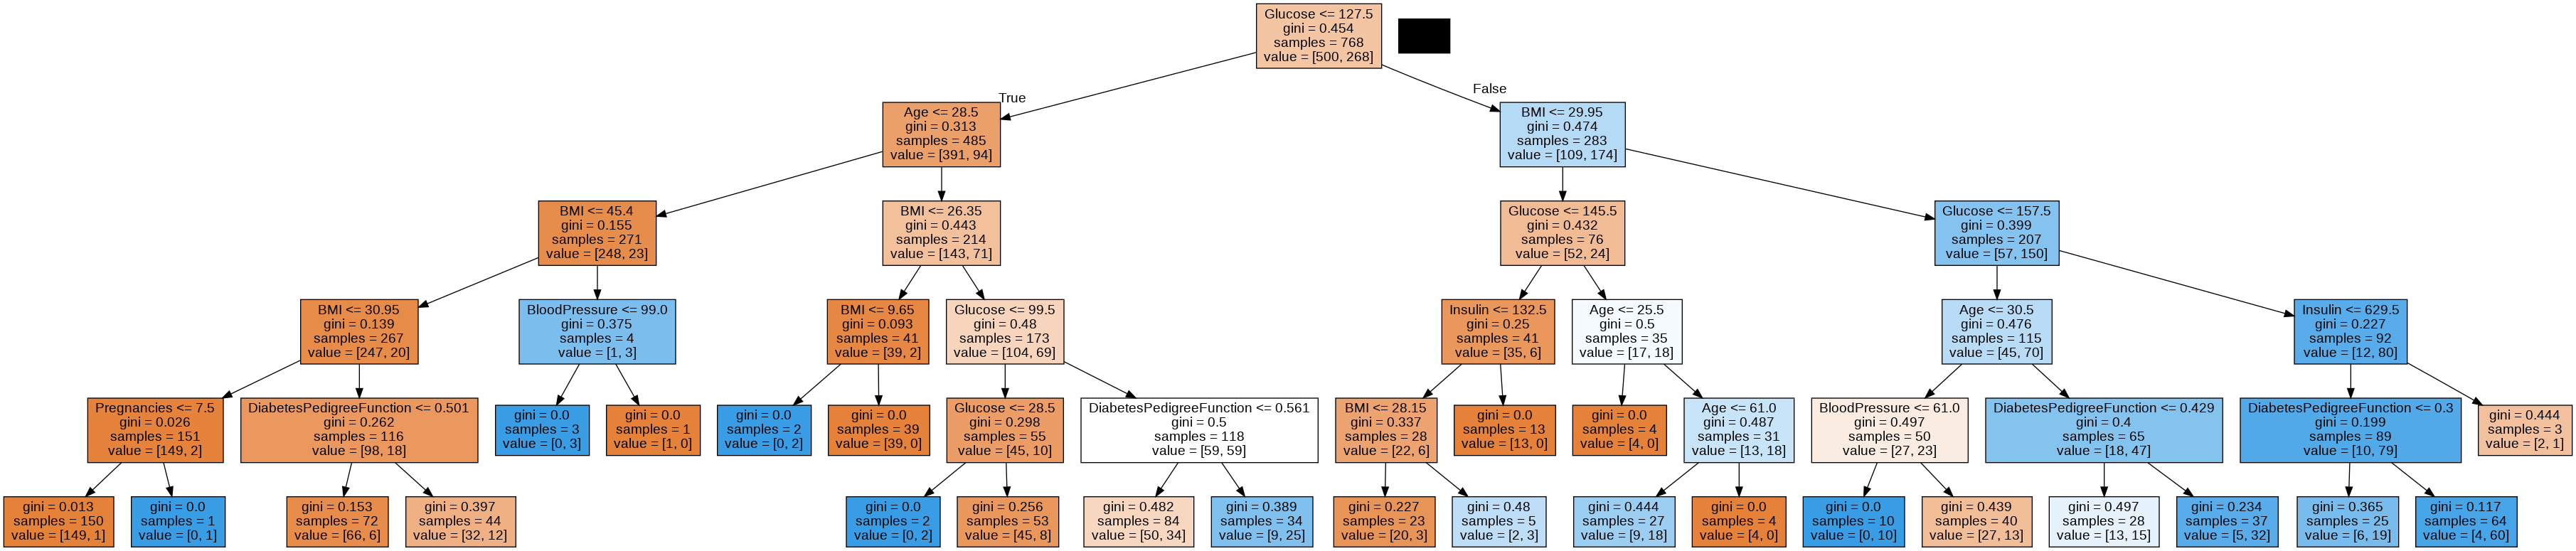

### **Extracting Decision Rules**

In [50]:
tree_rules = export_text(cart_final, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  

### **Extracting Python/Sql/Excel Codes of Decision Rules**

* **Python Codes**


In [51]:
# sklearn '0.23.1' versiyonu ile yapılabilir.
# pip install scikit-learn==0.23.1

print(skompile(cart_final.predict).to('python/code'))

(((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )



* **Sql Codes**

In [52]:
print(skompile(cart_final.predict).to('sqlalchemy/sqlite'))

SELECT CASE WHEN (x2 <= 127.5) THEN CASE WHEN (x8 <= 28.5) THEN CASE WHEN (x6 <= 45.39999961853027) THEN CASE WHEN (x6 <= 30.949999809265137) THEN CASE WHEN (x1 <= 7.5) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x3 <= 99.0) THEN 1 ELSE 0 END END ELSE CASE WHEN (x6 <= 26.350000381469727) THEN CASE WHEN (x6 <= 9.649999618530273) THEN 1 ELSE 0 END ELSE CASE WHEN (x2 <= 99.5) THEN CASE WHEN (x2 <= 28.5) THEN 1 ELSE 0 END ELSE CASE WHEN (x7 <= 0.5609999895095825) THEN 0 ELSE 1 END END END END ELSE CASE WHEN (x6 <= 29.949999809265137) THEN CASE WHEN (x2 <= 145.5) THEN CASE WHEN (x5 <= 132.5) THEN CASE WHEN (x6 <= 28.149999618530273) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x8 <= 25.5) THEN 0 ELSE CASE WHEN (x8 <= 61.0) THEN 1 ELSE 0 END END END ELSE CASE WHEN (x2 <= 157.5) THEN CASE WHEN (x8 <= 30.5) THEN CASE WHEN (x3 <= 61.0) THEN 1 ELSE 0 END ELSE 1 END ELSE CASE WHEN (x5 <= 629.5) THEN 1 ELSE 0 END END END END AS y 
FROM data


* **Excel Codes**

In [53]:
print(skompile(cart_final.predict).to('excel'))

A1=IF((x2<=127.5),IF((x ...418 chars skipped... ((x5<=629.5),1,0))))


### **Prediction using Python Codes**

* **Karar kurallarına göre fonksiyon ile model tahmini yapılır.**

In [54]:
def predict_with_rules(x):
    return ((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6864999830722809 else
        0) if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else ((1 if x[5
        ] <= 32.45000076293945 else 1 if x[3] <= 10.5 else 0) if x[2] <= 53.0 else
        ((0 if x[1] <= 111.5 else 0 if x[2] <= 72.0 else 1 if x[3] <= 31.0 else
        0) if x[2] <= 82.5 else 1) if x[4] <= 36.5 else 0) if x[6] <=
        0.5005000084638596 else (0 if x[1] <= 88.5 else (((0 if x[0] <= 1.0 else
        1) if x[1] <= 98.5 else 1) if x[6] <= 0.9269999861717224 else 0) if x[1
        ] <= 116.0 else 0 if x[4] <= 166.0 else 1) if x[2] <= 69.0 else ((0 if
        x[2] <= 79.0 else 0 if x[1] <= 104.5 else 1) if x[3] <= 5.5 else 0) if
        x[6] <= 1.098000019788742 else 1) if x[5] <= 45.39999961853027 else 0 if
        x[7] <= 22.5 else 1) if x[7] <= 28.5 else (1 if x[5] <=
        9.649999618530273 else 0) if x[5] <= 26.350000381469727 else (1 if x[1] <=
        28.5 else ((0 if x[0] <= 11.5 else 1 if x[5] <= 31.25 else 0) if x[1] <=
        94.5 else (1 if x[5] <= 36.19999885559082 else 0) if x[1] <= 97.5 else
        0) if x[6] <= 0.7960000038146973 else 0 if x[0] <= 3.0 else (1 if x[6] <=
        0.9614999890327454 else 0) if x[3] <= 20.0 else 1) if x[1] <= 99.5 else
        ((1 if x[5] <= 27.649999618530273 else 0 if x[0] <= 5.5 else (((1 if x[
        0] <= 7.0 else 0) if x[1] <= 103.5 else 0) if x[1] <= 118.5 else 1) if
        x[0] <= 9.0 else 0) if x[6] <= 0.19999999552965164 else ((0 if x[5] <=
        36.14999961853027 else 1) if x[1] <= 113.0 else 1) if x[0] <= 1.5 else
        (1 if x[6] <= 0.3620000034570694 else 1 if x[5] <= 30.050000190734863 else
        0) if x[2] <= 67.0 else (((0 if x[6] <= 0.2524999976158142 else 1) if x
        [1] <= 120.0 else 1 if x[6] <= 0.23899999260902405 else 1 if x[7] <=
        30.5 else 0) if x[2] <= 83.0 else 0) if x[5] <= 34.45000076293945 else
        1 if x[1] <= 101.0 else 0 if x[5] <= 43.10000038146973 else 1) if x[6] <=
        0.5609999895095825 else ((0 if x[7] <= 34.5 else 1 if x[5] <=
        33.14999961853027 else 0) if x[4] <= 120.5 else (1 if x[3] <= 47.5 else
        0) if x[4] <= 225.0 else 0) if x[0] <= 6.5 else 1) if x[1] <= 127.5 else
        (((((1 if x[1] <= 129.5 else ((1 if x[6] <= 0.5444999933242798 else 0) if
        x[2] <= 56.0 else 0) if x[2] <= 71.0 else 1) if x[2] <= 73.0 else 0) if
        x[5] <= 28.149999618530273 else (1 if x[1] <= 135.0 else 0) if x[3] <=
        21.0 else 1) if x[4] <= 132.5 else 0) if x[1] <= 145.5 else 0 if x[7] <=
        25.5 else ((0 if x[1] <= 151.0 else 1) if x[5] <= 27.09999942779541 else
        ((1 if x[0] <= 6.5 else 0) if x[6] <= 0.3974999934434891 else 0) if x[2
        ] <= 82.0 else 0) if x[7] <= 61.0 else 0) if x[5] <= 29.949999809265137
         else ((1 if x[2] <= 61.0 else (((((0 if x[6] <= 0.18299999833106995 else
        1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <=
        73.0 else 0) if x[0] <= 4.5 else 1 if x[6] <= 0.6169999837875366 else 0
        ) if x[6] <= 1.1414999961853027 else 1) if x[5] <= 41.79999923706055 else
        1 if x[6] <= 0.37299999594688416 else 1 if x[1] <= 142.5 else 0) if x[7
        ] <= 30.5 else (((1 if x[6] <= 0.13649999350309372 else 0 if x[5] <=
        32.45000076293945 else 1 if x[5] <= 33.05000114440918 else (0 if x[6] <=
        0.25599999725818634 else (0 if x[1] <= 130.5 else 1) if x[0] <= 8.5 else
        0) if x[0] <= 13.5 else 1) if x[2] <= 92.0 else 1) if x[5] <=
        45.54999923706055 else 1) if x[6] <= 0.4294999986886978 else (1 if x[5] <=
        40.05000114440918 else 0 if x[5] <= 40.89999961853027 else 1) if x[4] <=
        333.5 else 1 if x[2] <= 64.0 else 0) if x[1] <= 157.5 else ((((1 if x[7
        ] <= 25.5 else 0 if x[4] <= 87.5 else 1 if x[5] <= 45.60000038146973 else
        0) if x[7] <= 37.5 else 1 if x[7] <= 56.5 else 0 if x[6] <=
        0.22100000083446503 else 1) if x[6] <= 0.28849999606609344 else 0) if x
        [6] <= 0.3004999905824661 else 1 if x[7] <= 44.0 else (0 if x[7] <=
        51.0 else 1 if x[6] <= 1.1565000414848328 else 0) if x[0] <= 6.5 else 1
        ) if x[4] <= 629.5 else 1 if x[6] <= 0.4124999940395355 else 0)

X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [55]:
x = [12, 13, 20, 23, 4, 55, 12, 7]

predict_with_rules(x)

0

In [56]:
x = [6, 148, 70, 35, 0, 30, 0.62, 50]

predict_with_rules(x)

1

### **Saving and Loading Model**

In [57]:
joblib.dump(cart_final, "/content/gdrive/MyDrive/DSMLBC10/week_12 (15.12.22-21.12.22) ml/cart_final.pkl")

cart_model_from_disc = joblib.load("/content/gdrive/MyDrive/DSMLBC10/week_12 (15.12.22-21.12.22) ml/cart_final.pkl")

In [58]:
x = [12, 13, 20, 23, 4, 55, 12, 7]

cart_model_from_disc.predict(pd.DataFrame(x).T)

array([1])

: **AKIŞ**

* **Model kur**

* **Model nesnesini sakla**

* **Saklanılan model nesnesini yükle, çağır**

* **Çağırılan nesneye model tahmini yaptır**